In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["dir_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    229250.000000
mean        147.828471
std         120.560398
min          -1.000000
25%           0.000000
50%         190.000000
75%         240.000000
max         360.000000
Name: dir_o, dtype: float64

In [9]:
#resample visibility minor hour before
station=station_all[["dir_o","temp_o"]]


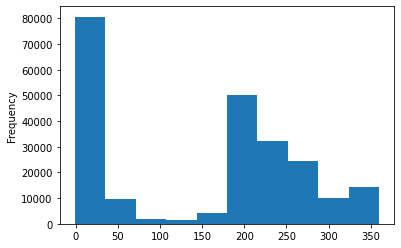

In [10]:

#station.value_counts()
station["dir_o"].plot.hist();

In [11]:
#visibility to interval
interval=pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])
labels=['VRB', '[0.0, 20.0]', '(20.0, 40.0]', '(40.0, 60.0]',
        '(60.0, 80.0]', '(80.0, 100.0]', '(100.0, 120.0]', '(120.0, 140.0]',
        '(140.0, 160.0]', '(160.0, 180.0]', '(180.0, 200.0]', '(200.0, 220.0]',
        '(220.0, 240.0]', '(240.0, 260.0]', '(260.0, 280.0]', '(280.0, 300.0]',
        '(300.0, 320.0]', '(320.0, 340.0]', '(340.0, 360.0]']

station["dir_l"]=pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station=station.drop(columns=["temp_o"])
station.sample(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dir_o,dir_l
time,,
2011-06-15 20:00:00,280.0,"(260.0, 280.0]"
2009-04-29 19:30:00,210.0,"(200.0, 220.0]"
2011-06-21 04:00:00,10.0,"[0.0, 20.0]"
2020-04-05 01:30:00,190.0,"(180.0, 200.0]"
2015-03-24 03:30:00,20.0,"[0.0, 20.0]"
2017-07-06 05:00:00,360.0,"(340.0, 360.0]"
2009-01-19 18:30:00,310.0,"(300.0, 320.0]"
2012-12-25 11:38:00,190.0,"(180.0, 200.0]"
2016-04-08 10:30:00,40.0,"(20.0, 40.0]"


**Forecast D1**

In [12]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,187.022110,8.649026,15.076856,100682.117188,284.099640,0.950480,3850.537842,18.529049,365.889740,0.43,...,0.000000,-0.000117,0.0,1.001866,1.0000,1.001866,5441.062012,1395.217041,250.198868,277.625000
2008-01-02 01:00:00,223.194687,4.872746,8.553699,100766.039062,284.302551,0.952351,24042.478516,7.432752,365.840179,1.41,...,271.859985,-0.630313,1.0,1.003662,1.0000,1.003662,5421.849121,1390.475952,249.379623,276.878235
2008-01-02 02:00:00,213.398468,4.058958,7.745996,100725.421875,283.516113,0.931136,24043.144531,10.536634,361.979858,0.15,...,265.820007,-2.348477,0.0,0.003704,0.0000,0.003704,5403.857910,1385.831055,247.717194,276.178528
2008-01-02 03:00:00,193.151459,4.297006,8.272406,100640.812500,283.482239,0.911970,24036.058594,16.033491,323.539062,0.66,...,271.260010,-4.300562,1.0,0.000267,1.0000,1.000000,5392.368164,1382.380981,247.006317,275.906799
2008-01-02 04:00:00,185.437576,5.599997,9.705170,100599.703125,283.220490,0.917263,24037.439453,16.895048,324.586517,1.60,...,274.359985,-3.418750,1.0,0.003440,1.0000,1.000000,5385.979004,1380.468018,246.807068,276.245819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12 19:00:00,157.686142,1.743530,4.707931,102008.992188,286.765930,0.922937,24102.066406,4.728705,312.395416,0.00,...,0.000000,-0.002773,0.0,0.500000,0.4000,0.500000,5657.847168,1509.066895,256.351013,281.325867
2020-11-12 20:00:00,132.306030,0.214833,3.802512,102066.460938,286.126678,0.942450,24164.826172,2.759448,370.614349,0.00,...,0.000000,0.000352,0.0,0.300000,0.5000,0.500000,5660.977051,1513.237671,256.373871,281.351135
2020-11-12 21:00:00,136.384262,1.121570,5.705152,102124.367188,286.267761,0.931932,24214.123047,3.625571,351.971375,0.00,...,0.000000,0.000469,0.0,0.300000,0.0625,0.300000,5664.547852,1517.838257,256.420868,280.955627


In [13]:
#label meteorological model prec points 0 to 9
model4k["dir0_l"]=pd.cut(model4k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["dir1_l"]=pd.cut(model4k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["dir2_l"]=pd.cut(model4k["dir2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["dir3_l"]=pd.cut(model4k["dir3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

In [14]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["dir_o"])
df_all4k[["dir_l","dir0_l","dir1_l"]].sample(20)

,dir_l,dir0_l,dir1_l
time,,,
2011-03-15 03:00:00,"(160.0, 180.0]","(120.0, 140.0]","(120.0, 140.0]"
2018-02-20 05:00:00,"(20.0, 40.0]","(20.0, 40.0]","(20.0, 40.0]"
2017-02-20 13:00:00,"(180.0, 200.0]","[0.0, 20.0]","(60.0, 80.0]"
2017-07-04 10:00:00,VRB,"(200.0, 220.0]","(200.0, 220.0]"
2010-06-23 15:00:00,"(240.0, 260.0]","(260.0, 280.0]","(300.0, 320.0]"
2009-12-20 08:00:00,"(220.0, 240.0]","(140.0, 160.0]","(140.0, 160.0]"
2016-11-17 11:00:00,"(240.0, 260.0]","(160.0, 180.0]","(140.0, 160.0]"
2010-10-20 07:00:00,"(200.0, 220.0]","(80.0, 100.0]","(100.0, 120.0]"
2014-02-15 03:00:00,"(180.0, 200.0]","(240.0, 260.0]","(240.0, 260.0]"


In [15]:
print("station\n",df_all4k["dir_l"].value_counts())
print("point 0\n",df_all4k["dir0_l"].value_counts())



station
 VRB               18397
[0.0, 20.0]       14893
(180.0, 200.0]    13655
(200.0, 220.0]    10353
(260.0, 280.0]     8488
(220.0, 240.0]     8046
(240.0, 260.0]     6875
(160.0, 180.0]     6620
(340.0, 360.0]     5808
(20.0, 40.0]       5254
(280.0, 300.0]     3084
(40.0, 60.0]       2412
(300.0, 320.0]     2121
(320.0, 340.0]     1896
(140.0, 160.0]      765
(60.0, 80.0]        755
(80.0, 100.0]       672
(100.0, 120.0]      500
(120.0, 140.0]      338
Name: dir_l, dtype: int64
point 0
 (260.0, 280.0]    11881
[0.0, 20.0]        9257
(160.0, 180.0]     9045
(280.0, 300.0]     8726
(140.0, 160.0]     7846
(100.0, 120.0]     7467
(120.0, 140.0]     6645
(80.0, 100.0]      6189
(340.0, 360.0]     6061
(180.0, 200.0]     5748
(20.0, 40.0]       5339
(300.0, 320.0]     4866
(240.0, 260.0]     4722
(220.0, 240.0]     4186
(200.0, 220.0]     4085
(320.0, 340.0]     3812
(40.0, 60.0]       2671
(60.0, 80.0]       2386
Name: dir0_l, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



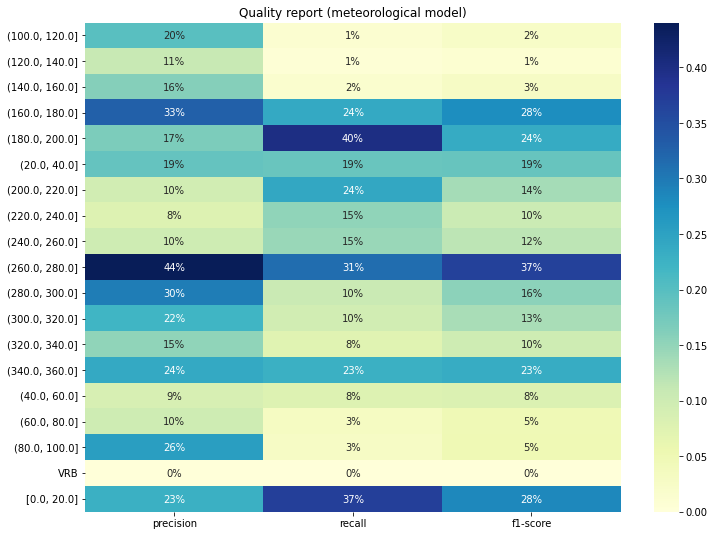

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.dir0_l,df_all4k.dir_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


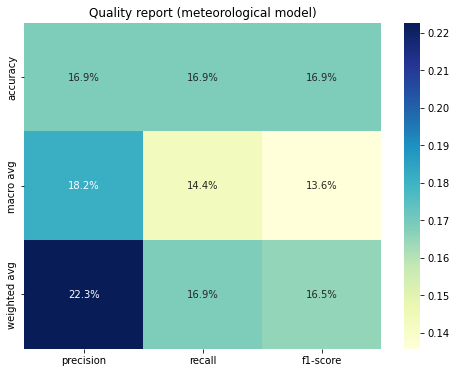

In [17]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

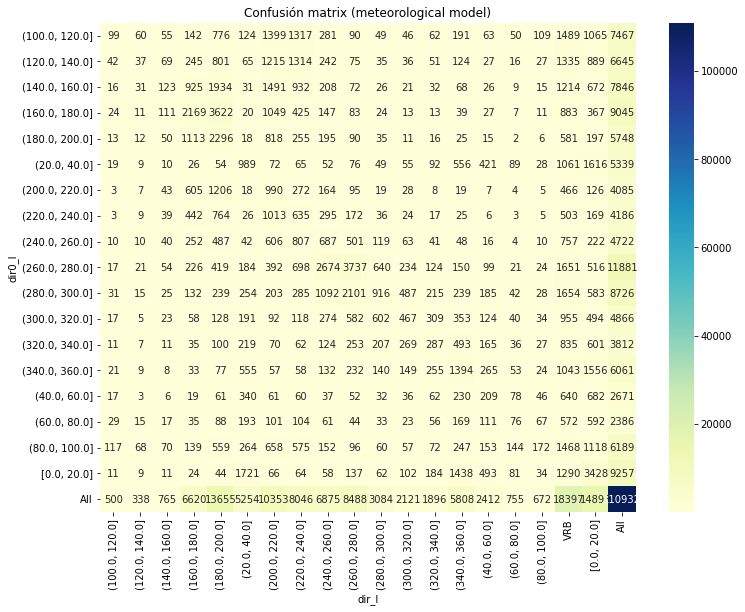

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Confusión matrix (meteorological model)")
import seaborn as sns
global_sc=pd.crosstab( df_all4k.dir0_l,df_all4k.dir_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

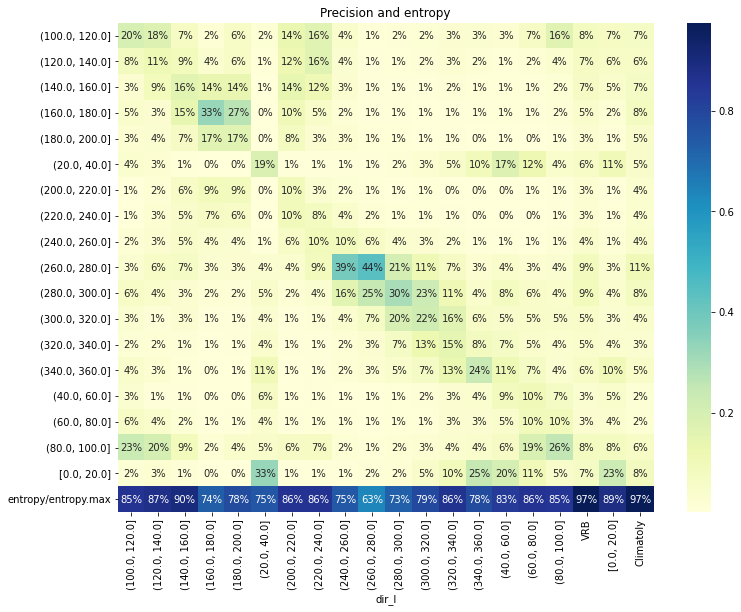

In [19]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy")
column_sc=pd.crosstab( df_all4k.dir0_l,df_all4k.dir_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatoly"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**machine learning d0 or d1**

In [20]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k.drop(columns=["dir0_l","dir1_l","dir2_l","dir3_l",]),
             target = 'dir_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,dir_l
2,Target Type,Multiclass
3,Label Encoded,"(100.0, 120.0]: 0, (120.0, 140.0]: 1, (140.0, ..."
4,Original Data,"(110932, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.3439,0.8157,0.2114,0.3346,0.3276,0.2619,0.2638,20.160
rf,Random Forest Classifier,0.3437,0.8173,0.2086,0.3356,0.3265,0.2611,0.2631,50.222
lightgbm,Light Gradient Boosting Machine,0.3443,0.8251,0.2089,0.3353,0.3243,0.2618,0.2642,22.134
knn,K Neighbors Classifier,0.2623,0.6933,0.1783,0.2584,0.2570,0.1849,0.1853,5.994
dt,Decision Tree Classifier,0.2400,0.5803,0.1651,0.2403,0.2401,0.1605,0.1605,2.938
ada,Ada Boost Classifier,0.2870,0.7672,0.1543,0.2493,0.2383,0.1965,0.2018,15.130
lda,Linear Discriminant Analysis,0.2524,0.7255,0.1285,0.2264,0.2187,0.1487,0.1534,1.034
lr,Logistic Regression,0.2571,0.7213,0.1175,0.2264,0.2066,0.1483,0.1548,88.716
nb,Naive Bayes,0.2259,0.7491,0.1675,0.2357,0.1911,0.1564,0.1627,0.336
ridge,Ridge Classifier,0.2535,0.0000,0.1080,0.2176,0.1853,0.1370,0.1468,0.164


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [21]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3493,0.8249,0.2141,0.3375,0.3290,0.2679,0.2702
1,0.3423,0.8244,0.2084,0.3335,0.3240,0.2595,0.2618
2,0.3478,0.8276,0.2121,0.3372,0.3288,0.2660,0.2682
3,0.3423,0.8218,0.2068,0.3331,0.3240,0.2598,0.2620
4,0.3469,0.8252,0.2098,0.3372,0.3279,0.2650,0.2673
Mean,0.3457,0.8248,0.2102,0.3357,0.3267,0.2636,0.2659
SD,0.0029,0.0019,0.0026,0.0020,0.0023,0.0034,0.0034


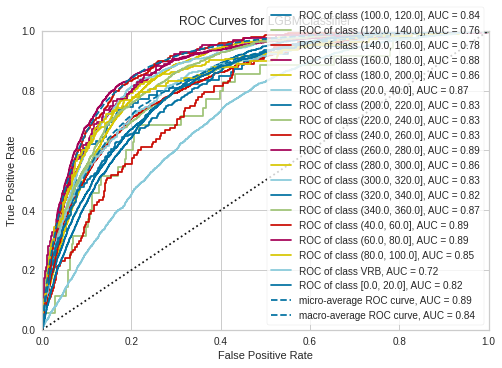

In [22]:
plot_model(model, plot = 'auc')

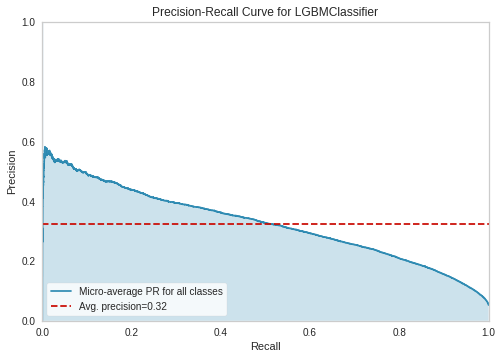

In [23]:
plot_model(model, plot = 'pr')

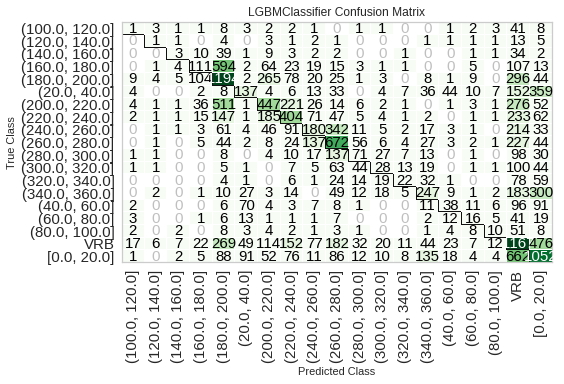

In [24]:
plot_model(model,'confusion_matrix')

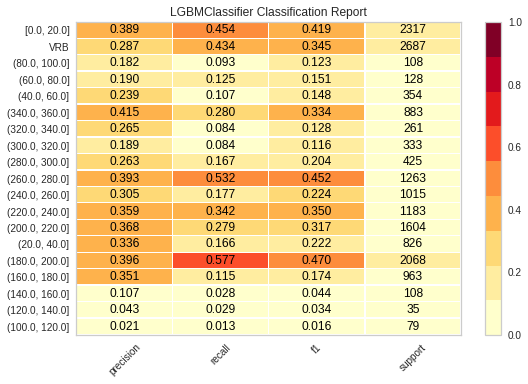

In [25]:
plot_model(model,'class_report')

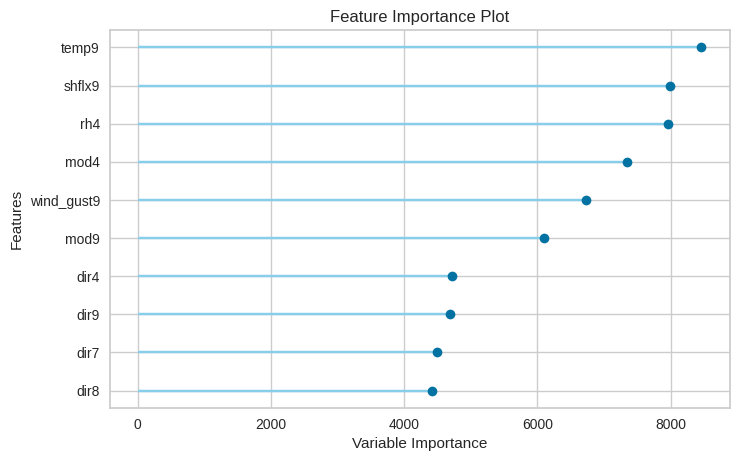

In [26]:
plot_model(model,"feature")

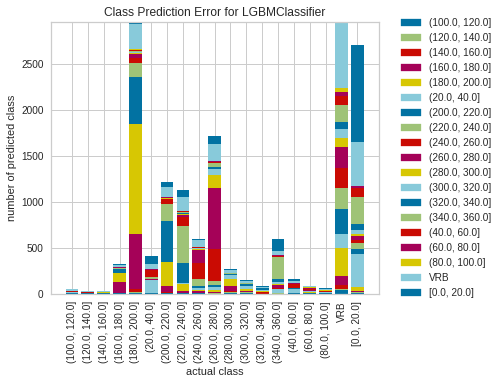

In [27]:
plot_model(model,"error")

**Export model**

In [28]:
x_var=get_config("X_train").columns
x_var

Index(['dir0', 'mod9', 'dir4', 'rh4', 'shflx9', 'dir5', 'dir7', 'wind_gust9',
       'temp9', 'dir3', 'dir9', 'dir2', 'dir6', 'mod4', 'dir8', 'dir1'],
      dtype='object')

In [29]:
#define x and y
Y=df_all4k.dir_l
X=df_all4k[x_var]

In [30]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


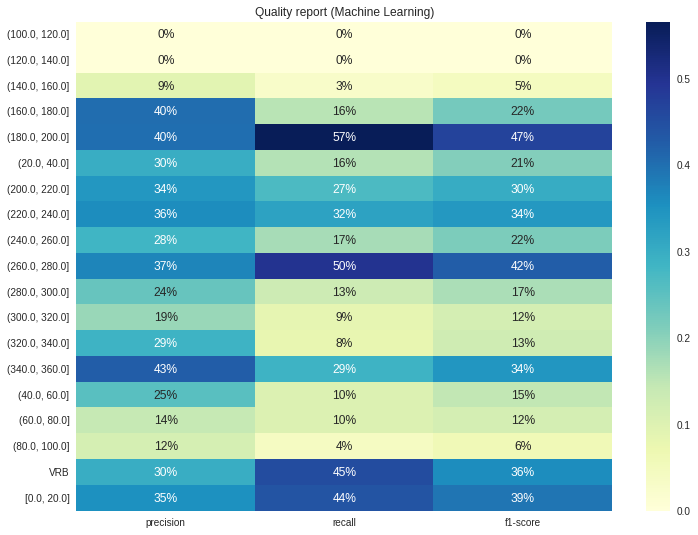

In [31]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


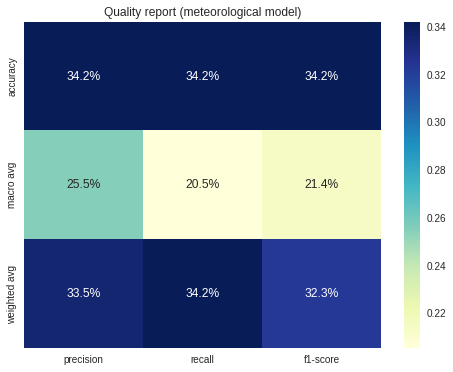

In [34]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

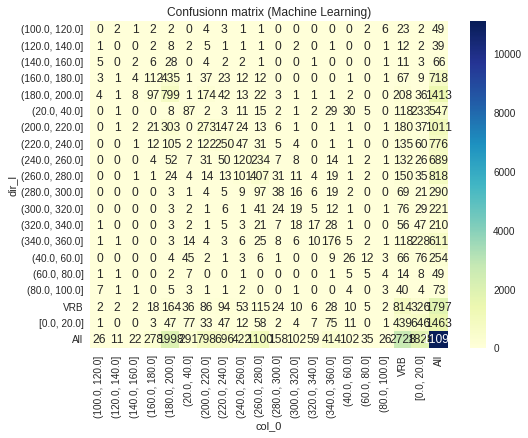

In [32]:
plt.figure(figsize=(8, 6))
plt.title("Confusionn matrix (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

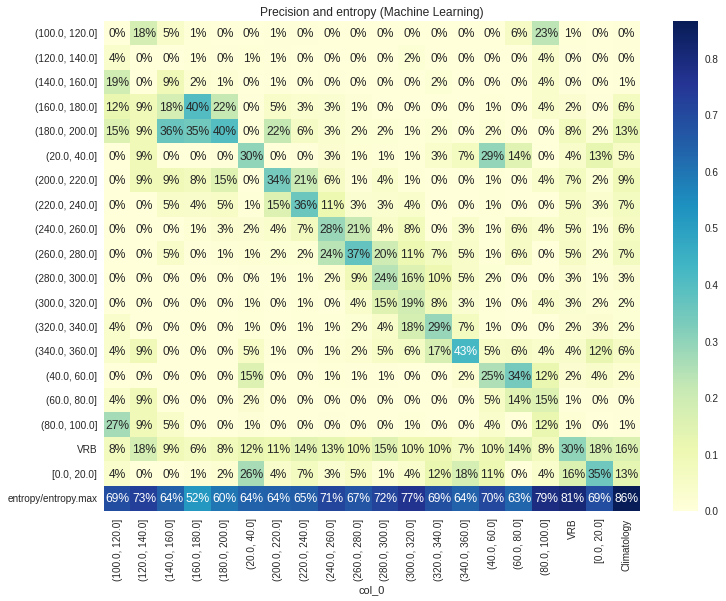

In [33]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy (Machine Learning)")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [35]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("dir_LEVX_d1.al", 'wb'))